# IE 5137 Computational Modelling in Industrial Engineering

## Assignment 6

### Question 1 (20)


$(a)$ Generate 1000 random variates from a gamma distribution with shape and scale parameters of 2, using the appropriate class from the scipy.stats module. 
Recall this distribution is given by

$$f(x;a,s)=\frac{x^{a-1}}{s^a  Γ(a) }  exp⁡(-\frac{x}{s})$$

for $x≥0$, where $a>0$ and $s>0$ are the shape and scale parameters and $Γ$ is the gamma function.

$(b)$ Plot a normalized histogram of the random samples and overlay the probability density function of the source distribution as a continuous line. \
Include enough points for the latter to look smooth.

$(c)$ Compare the mean and median of this distribution using the appropriate class methods. \
Which one is better estimator for its center?

$(d)$ Try to recover the shape and scale parameters by using the fit method on the random variates.



In [3]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [32]:
g = stats.gamma(scale=2, a=2)
r = g.rvs(1000)

In [35]:
x = np.linspace(0, 20, 100)

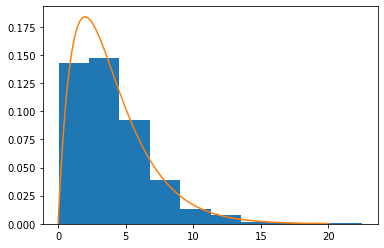

In [37]:
plt.hist(r, density=True)
plt.plot(x, g.pdf(x));

In [33]:
print(g.median())
print(g.mean())

3.3566939800333224
4.0


In [6]:
# median is better since skewed

In [7]:
stats.gamma.fit(r)

(1.9481019009083251, -0.0006732385337170886, 2.046148397856598)

In [8]:
# shape = 2.085 vs 2, location = 0.002 vs 0, scale = 1.932 vs 2, so good fit

### Question 2 (20)

$(a)$ Load the iris dataset included with sklearn as a DataFrame. \
Use `(shift-)tab` completion (or the help command) to find the appropriate load function argument and returned object attributes.

$(b)$ Compute the median and interquartile range of sepal length and width across the entire dataset using the appropriate functions from the scipy.stats module.

$(c)$ Compute the correlation between petal length and width for the entire dataset, then separately for each species. \
Are there any differences?

$(d)$ Use the Kruskal-Wallis test to check if the three species have similar flower areas - approximated using $$3 * petal\_width * petal\_length + 3 * sepal\_width * sepal\_length.$$ \
Confirm that a non-parametric approach was necessary using Levene’s test for homogeneity of variance.


In [2]:
from sklearn import datasets

In [1]:
#dat = datasets.load_iris(as_frame=True)
#df = dat.frame
#df.head()

from sklearn import datasets
import pandas as pd
import numpy as np

iris1 = datasets.load_iris()
df = pd.DataFrame(iris1.data,columns=iris1.feature_names)
df['target'] = pd.Series(iris1.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
iris1['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
np.median(df.iloc[:, :2], axis=0)

array([5.8, 3. ])

In [10]:
stats.iqr(df.iloc[:, :2], axis=0)

array([1.3, 0.5])

In [8]:
stats.pearsonr(df['petal length (cm)'], df['petal width (cm)'])

(0.962865431402796, 4.6750039073285846e-86)

In [9]:
for i in range(3):
    d = df[df['target'] == i]
    print(stats.pearsonr(d['petal length (cm)'], d['petal width (cm)']))

(0.33163004080411873, 0.018638915007537234)
(0.7866680885228169, 1.27191570632364e-11)
(0.32210821590031835, 0.022535767279873883)


In [15]:
# individual groups have low correlations but overall dataset does 

In [15]:
df['area'] = 3*(df.iloc[:, 1] * df.iloc[:, 2]) + 3*(df.iloc[:, 3] * df.iloc[:, 4])
stats.kruskal(df.iloc[:50, 5], df.iloc[50:100, 5], df.iloc[100:, 5])

KruskalResult(statistic=129.7586655501209, pvalue=6.656773593610452e-29)

In [16]:
stats.levene(df.iloc[:50, 5], df.iloc[50:100, 5], df.iloc[100:, 5])

LeveneResult(statistic=19.834822112775615, pvalue=2.3654140502921904e-08)

In [18]:
# levene test is significant, so groups have different variances => non-parametric test was necessary

### Question 3 (20)

$(a)$ Import the customer dataset from the attached UniversalBank.csv file as a DataFrame. \
Create a new column storing the total number of accounts they have open with this bank.

$(b)$ Use the appropriate statsmodels object to model income as a linear function of age, education level, work experience, family size, number of open accounts, and online banking use. \
Pay attention to any categorical variables encoded in numerical form.

$(c)$ Print a summary of the fitted model and inspect the results; pay close attention to any warnings. \
Then rerun the fit removing any variables that did not have a significant impact, or that you suspect to be highly correlated with other predictors.

$(d)$ Use the t_test_pairwise method to identify the education levels that differ significantly from each other in terms of income. _(Use tab-completion to find the attribute storing the results)._


In [17]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
df = pd.read_csv(r'C:\Users\sdeva\Downloads\UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [21]:
df['Accounts'] = df.iloc[:, -1] + df.iloc[:, -3] + df.iloc[:, -4] + df.iloc[:, -5]
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Accounts
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1


In [22]:
mod = smf.ols('Income ~ Family + Experience + C(Education) + Age + Accounts + C(Online)', df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     111.5
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          2.13e-152
Time:                        15:32:14   Log-Likelihood:                -25878.
No. Observations:                5000   AIC:                         5.177e+04
Df Residuals:                    4992   BIC:                         5.182e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           118.7585     12.90

In [23]:
# online banking not significant, multi-collinearity warning - maybe age and experience?

In [24]:
mod = smf.ols('Income ~ Family + Experience + C(Education) + Accounts', df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     155.4
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          7.41e-154
Time:                        15:32:16   Log-Likelihood:                -25880.
No. Observations:                5000   AIC:                         5.177e+04
Df Residuals:                    4994   BIC:                         5.181e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            95.2411      1.92

In [25]:
c = res.t_test_pairwise('C(Education)')
c.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2-1,-20.059524,1.495359,-13.414521,2.464210e-40,-22.991084,-17.127964,0.000000,True
3-1,-19.771399,1.452252,-13.614301,1.796256e-41,-22.618451,-16.924347,0.000000,True
3-2,0.288125,1.597895,0.180315,8.569124e-01,-2.844451,3.420701,0.856912,False


In [26]:
# education level 1 commands higher salaries than levels 2 and 3

### Question 4 (20)

$(a)$ Import the breast cancer dataset from the attached csv file. \
Extract the various pathology scores into a features matrix and the type of cancer into a target array using implicit data frame indexing.

$(b)$ Compute the first two principal components of the features matrix, then visualize the dataset in this reduced space using a scatter plot. \
Color the points based on cancer type; use logical operations to convert the target array to an appropriate format for color indexing.

$(c)$ Use k-means clustering to partition the dataset into two groups. \
How do these groups differ from the known cancer type labels? _(You can use the confusion_matrix function to find the overlap)._

$(d)$ Repeat the above analysis using the extracted principal components instead. \
What is the impact of dimensionality reduction?


In [11]:
d = pd.read_csv('Breast_Cancer.csv')
d.head()

,Unnamed: 0,ID,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1,3,1,1,Benign
1,2,1002945,5,4,4,5,7,10,3,2,1,Benign
2,3,1015425,3,1,1,1,2,2,3,1,1,Benign
3,4,1016277,6,8,8,1,3,4,3,7,1,Benign
4,5,1017023,4,1,1,3,2,1,3,1,1,Benign


In [28]:
x = d.values[:, 2 : 11]
y = d['Class']

In [29]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2)
pc.fit(x, y)

PCA(n_components=2)

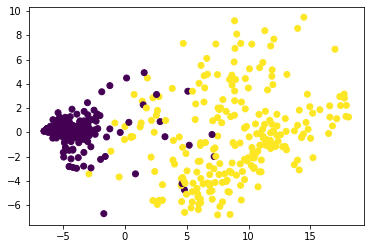

In [30]:
x2 = pc.transform(x)
plt.scatter(x2[:, 0], x2[:, 1], c=(y == 'Malignant'))

In [31]:
from sklearn.cluster import KMeans
c = KMeans(n_clusters=2).fit(x).predict(x)

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y == 'Malignant', c))

[[435   9]
 [ 18 221]]


In [33]:
# clusters match really well with actual cancer types, though malign ones are more likely to be mislabeled

In [34]:
c2 = KMeans(n_clusters=2).fit(x2).predict(x2)
print(confusion_matrix(y == 'Malignant', c2))

[[435   9]
 [ 18 221]]


In [35]:
# no difference - the top 2 principal components preserve sufficient information to recover the cluster structure

### Question 5 (20)

$(a)$ Fit a nearest-neighbor classifier (i.e., using a n_neighbors hyperparameter of 1) to the dataset used in the previous exercise, then measure its performance. \
Do you notice any problems?

$(b)$ Partition the dataset into a 70% training sample and a 30% testing sample, and rerun the fit using the training set only. How does the model perform on the test set?

$(c)$ Repeat the analysis using the default number of neighbors. Does the new model perform better? Which type of cancer is predicted more accurately? _(Use the classification_report function.)_

$(d)$ Use 10-fold cross validation to fit support vector machine and random forest classifiers to the full dataset. Print the average accuracy score in each case.


In [36]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(1).fit(x, y)

In [37]:
kn.score(x, y)

1.0

In [38]:
# perfect accuracy - model is most likely overfit

In [39]:
from sklearn.model_selection import train_test_split
xa, xb, ya, yb = train_test_split(x, y, test_size = 0.3)

In [40]:
kn.fit(xa, ya).score(xb, yb)

0.9658536585365853

In [41]:
# performance on test data set is lower, as expected

In [42]:
KNeighborsClassifier().fit(xa, ya).score(xb, yb)

0.9707317073170731

In [43]:
# better performance using default number of neighbors

In [44]:
from sklearn.metrics import classification_report
print(classification_report(yb, kn.predict(xb)))

              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97       121
   Malignant       0.99      0.93      0.96        84

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



In [45]:
# lower performance for malign cancers (= the important ones)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(SVC(), x, y, cv=10)))

0.9707800511508949


In [47]:
from sklearn.ensemble import RandomForestClassifier
print(np.mean(cross_val_score(RandomForestClassifier(), x, y, cv=10)))

0.9708013640238704


In [48]:
# similar performance, slightly better than nearest neighbors